## Movies Database

### The Dataset:
- This dataset was taken from 'Movie Database TMDB' and it includes information on 10.000 movies.

### Research Questions: 
1. Does higher budget mean higher popularity ? Is there a coefficient relationship ?
2. Will the runtime affect the vote count and popularity?
3. Higher popularity means higher profits ?
4. What Features are Associated with Top 10 Revenue Movies ?
5. Which genres are most popular from year to year?


### Start Virtual Environment

- A Virtual Environment was started to avoid conflicts of libraries. This was done via the prompt command, and the file can be found saved as
'requirements.txt'

### Install Libraries 

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("data/tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data Wrangling

i. Get familiar with data types 

In [6]:
# check dtypes of variables 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.shape

(10866, 21)

In [8]:
# check unique values for each column 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

i. Clean duplicates.

In [9]:
# remove duplicates 
df_cleaned = df.drop_duplicates()
df_cleaned.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# check NaNs
df_cleaned.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# create a copy of data before dropping data
df_copy = df_cleaned.copy()
df_copy.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# remove columns: id, homepage - as not needed
df_copy = df_copy.drop(['id', 'homepage'], axis=1)
df_copy.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


ii. Print statistics of the dataset.

In [13]:
# print statistics of data 
pd.set_option('float_format', '{:f}'.format) # ensures it prints full numbers 

stats = df_copy.describe()
stats

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,14624286.064335,39826896.076852,102.071790,217.399632,5.975012,2001.321859,17549894.037321,51369001.758843
std,1.000231,30914284.610733,117008277.458494,31.382701,575.644627,0.935138,12.813260,34307526.658364,144638333.128986
min,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,0.207575,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,0.383831,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000
75%,0.713857,15000000.000000,24000000.000000,111.000000,146.000000,6.600000,2011.000000,20853251.084404,33701729.009464
max,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000,425000000.000000,2827123750.411890


In [14]:
df_copy['popularity'].describe()

count   10865.000000
mean        0.646446
std         1.000231
min         0.000065
25%         0.207575
50%         0.383831
75%         0.713857
max        32.985763
Name: popularity, dtype: float64

iii. Visualize the dataset using histograms. 

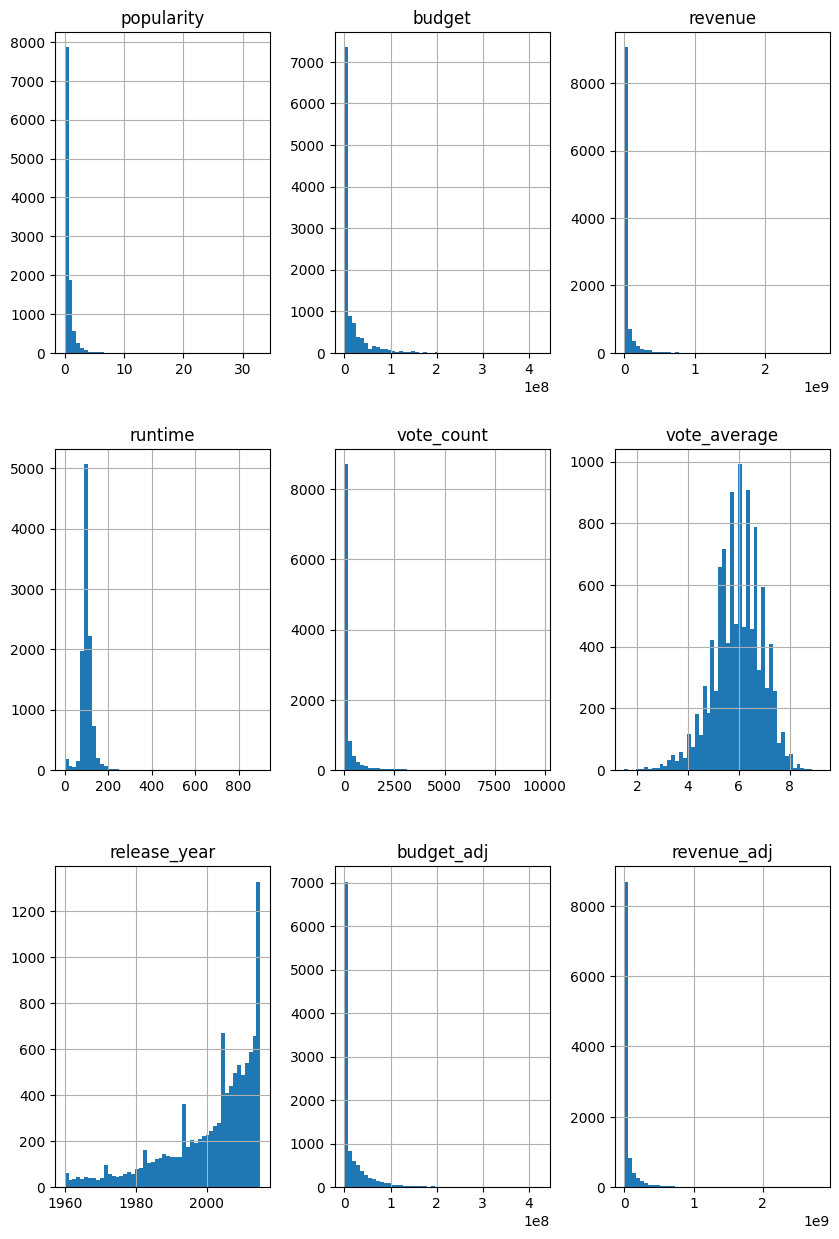

In [15]:
# create an histogram for distribution of data 
# Plotting the histogram
df_copy.hist(bins= 50, figsize=(10, 15))
plt.show()

### 1) Does higher budget mean higher popularity? Is there a coefficient relationship? 

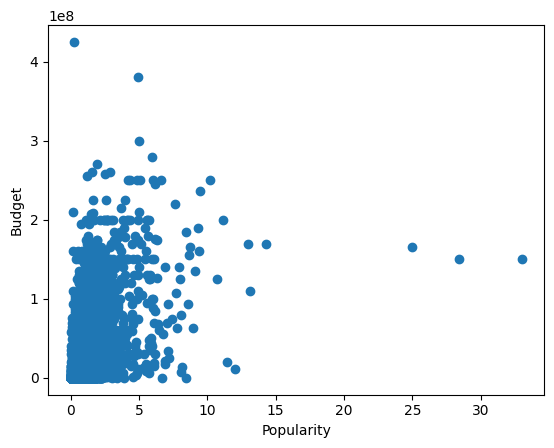

In [16]:
# create a scatter plot 
x = df_copy['popularity']
y = df_copy['budget']

plt.scatter(x, y)

plt.xlabel("Popularity")
plt.ylabel("Budget")

plt.show()

- From the graph above, we can see that there's no relationship between 'budget' and 'popularity'
- We run a correlation test to confirm this

In [17]:
# calculate correlation coefficient
correlation = df_copy['popularity'].corr(df_copy["budget"])
correlation

np.float64(0.545480792930962)

- When performing correlation, we get an r value of 0.5, which describe a moderately positive correlation between
budget and popularity.
- This means that there's a slight increase in popularity as budget increases 

### 2) Will the runtime affect the vote count and popularity?

In [18]:
#select relevant variables 
new_df = df_copy[['runtime', 'vote_count', 'popularity']]

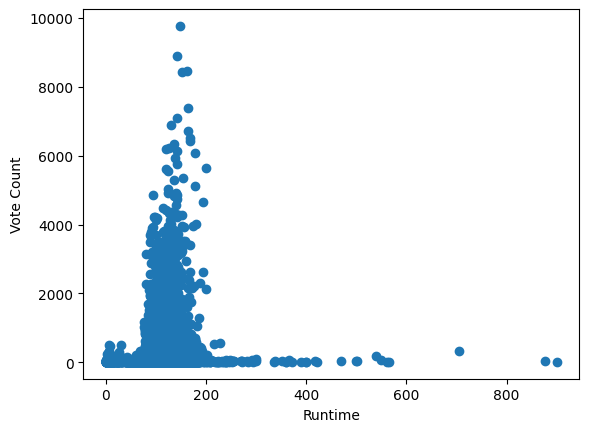

In [19]:
# visualize relationship between 'Runtime' and 'Vote Count'
x = new_df['runtime']
y = new_df['vote_count']

plt.scatter(x,y)

plt.xlabel("Runtime")
plt.ylabel("Vote Count")

plt.show()

In [20]:
# run correlation test 
corr_runtime_vote = new_df['runtime'].corr(df_copy["vote_count"])
corr_runtime_vote

np.float64(0.1632733505292407)

- The graph above doesn't show a relationship between the two variables, meaning that
vote count doesn't increase with the duration of a movie (runtime)
- This was confirmed by r value = 0.1, showing a very weak positive correlation

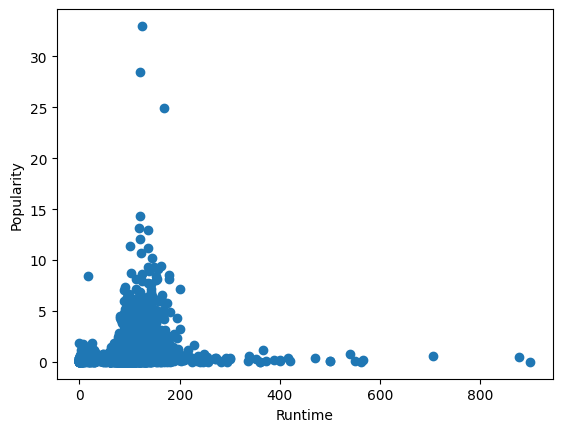

In [21]:
# visualize relationship between 'runtime' and 'popularity'

x = new_df['runtime']
y = new_df['popularity']

plt.scatter(x,y)

plt.xlabel("Runtime")
plt.ylabel("Popularity")

plt.show()


In [22]:
# run correlation test 
corr_runtime_popularity = new_df['runtime'].corr(df_copy["popularity"])
corr_runtime_popularity

np.float64(0.13903177277430567)

- A very weak positive relationship was found between 'runtime' and 'popularity', meaning that a higher runtime didn't correlate to higher popularity. 

In [47]:
# divide runtime in low, medium and high 
bins = [0, 90, 99, 111]  # Adjust the upper limit according to your data
labels = ['low', 'medium', 'high']

# Create a new column for runtime categories
df_copy['runtime_category'] = pd.cut(df_copy['runtime'], bins=bins, labels=labels, right=False)

print(df_copy)

         imdb_id  popularity     budget     revenue  \
0      tt0369610   32.985763  150000000  1513528810   
1      tt1392190   28.419936  150000000   378436354   
2      tt2908446   13.112507  110000000   295238201   
3      tt2488496   11.173104  200000000  2068178225   
4      tt2820852    9.335014  190000000  1506249360   
...          ...         ...        ...         ...   
10861  tt0060371    0.080598          0           0   
10862  tt0060472    0.065543          0           0   
10863  tt0060161    0.065141          0           0   
10864  tt0061177    0.064317          0           0   
10865  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Gr

In [51]:
# calculate mean vote count and mean vote count for each group of runtime 
runtime = df_copy.groupby('runtime_category')[['vote_count', 'popularity']].mean()
print(runtime)

                  vote_count  popularity
runtime_category                        
low                84.859627    0.416414
medium            132.643411    0.514358
high              199.197114    0.643996


C:\Users\papic\AppData\Local\Temp\ipykernel_22360\2737734959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime = df_copy.groupby('runtime_category')[['vote_count', 'popularity']].mean()


- When 'runtime' is divided into three groups (low, medium, high) we can see that the mean for both vote count
and popularity increases with higher runtime
- This suggests that movies that last longer 

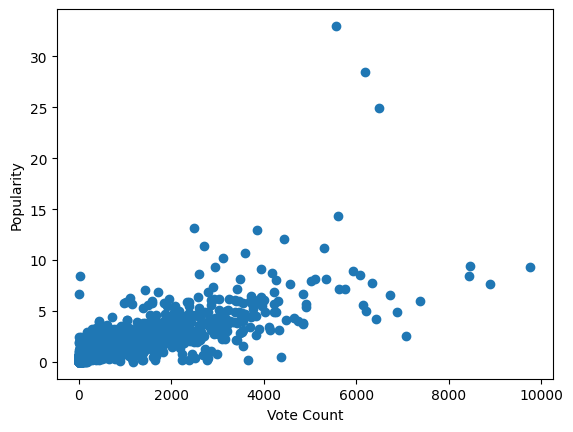

In [23]:
# Visualize relationship between vote_count and popularity 
x = new_df['vote_count']
y = new_df['popularity']

plt.scatter(x,y)

plt.xlabel("Vote Count")
plt.ylabel("Popularity")

plt.show()

In [24]:
# run correlation test 
corr_vote_popularity = new_df['vote_count'].corr(df_copy["popularity"])
corr_vote_popularity

np.float64(0.8008284932673039)

- A strong positive correlation was found between 'vote-count' and 'popularity'
- This suggests that as movies with a higher number of votes scored higher in popularity

### 3) Does higher popularity mean higher profits?

In [25]:
# create and add new variable 'profits' to df
df_copy['profits'] = df_copy['budget'] - df_copy['revenue']

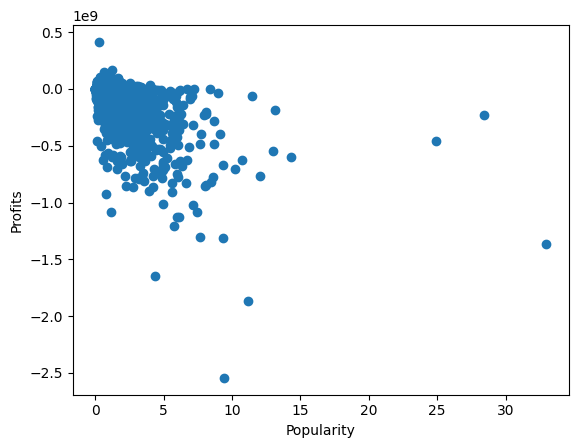

In [26]:
# visualize 'popularity' and 'profits' 
x = df_copy['popularity']
y = df_copy['profits']

plt.scatter(x,y)

plt.xlabel("Popularity")
plt.ylabel("Profits")

plt.show()


In [27]:
# run correlation test 
corr_profit_popularity = df_copy['popularity'].corr(df_copy["profits"])
corr_profit_popularity

np.float64(-0.6289972839642601)

- The graph and r value (-0.62) show a moderate negative correlation, meaning that as popularity
increases, profits decrease. 

### 4) What Features are associated with the Top 10 Movies for Revenue?

In [29]:
# Get the top 10 movies by revenue
top_10_movies = df_copy.nlargest(10, 'revenue')
top_10_movies

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100000,2009,240886902.887613,2827123750.411890,-2544505847
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820,-1868178225
5231,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.300000,1997,271692064.214419,2506405735.419470,-1645034188
4361,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.300000,2012,208943741.897494,1443191435.206070,-1299557910
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800,-1363528810
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520,-1316249360
14,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.400000,2015,257599886.656049,1292632336.881770,-1125035767
3374,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.700000,2011,121174755.323934,1287183997.564870,-1202817822
5422,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.500000,2013,140405002.911063,1192711491.119850,-1124219009
5425,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|t

In [30]:
# Select features to keep (exclude certain variables)
variables_to_keep = ['popularity', 'budget','revenue', 'vote_count', 'release_year', 'profits']
filtered_top_10_movies = top_10_movies[variables_to_keep]


In [31]:
correlation_matrix = filtered_top_10_movies.corr()
print(correlation_matrix['revenue'])


popularity      0.056189
budget          0.361870
revenue         1.000000
vote_count      0.458219
release_year   -0.304175
profits        -0.995768
Name: revenue, dtype: float64


- The factor most affecting 'revenue' was 'profits': as profits increased, revenue descreased and vice versa. 

### 5) From the Top 10 Movies, which Genres were most popular from year to year?

In [32]:
top_10_movies['genres'].unique()

array(['Action|Adventure|Fantasy|Science Fiction',
       'Action|Adventure|Science Fiction|Fantasy',
       'Drama|Romance|Thriller', 'Science Fiction|Action|Adventure',
       'Action|Adventure|Science Fiction|Thriller',
       'Action|Crime|Thriller', 'Action|Adventure|Science Fiction',
       'Adventure|Family|Fantasy', 'Animation|Adventure|Family'],
      dtype=object)

In [33]:
# Split the 'genres' column and explode it into separate rows
top_ten_genres = top_10_movies.assign(genres=top_10_movies['genres'].str.split('|')).explode('genres')
top_ten_genres.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100000,2009,240886902.887613,2827123750.411890,-2544505847
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Adventure,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100000,2009,240886902.887613,2827123750.411890,-2544505847
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Fantasy,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100000,2009,240886902.887613,2827123750.411890,-2544505847
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.100000,2009,240886902.887613,2827123750.411890,-2544505847
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820,-1868178225


In [34]:
# Count the occurrences of each genre per year
groupby_year = top_ten_genres[['release_year', 'genres']]
groupby_year

# top_ten_genres.groupby(['release_year']).size().reset_index(name='count')
# groupby_year

,release_year,genres
1386,2009,Action
1386,2009,Adventure
1386,2009,Fantasy
1386,2009,Science Fiction
3,2015,Action
3,2015,Adventure
3,2015,Science Fiction
3,2015,Fantasy
5231,1997,Drama
5231,1997,Romance


In [35]:
most_common_genres = top_ten_genres.groupby('release_year')['genres'].agg(lambda x: x.value_counts().idxmax())
most_common_genres

release_year
1997              Drama
2009             Action
2011          Adventure
2012    Science Fiction
2013          Adventure
2015             Action
Name: genres, dtype: object

### Conclusion

Through this project, it was found that:
1. Higher budget moderately resulted in higher popularity
2. The length of a movie (runtime) wasn't correlated with vote count and popularity
3. As popularity increased, profits decreased
4. The features most associated with Top 10 Revenue Movies was 'profits'
5. Drama and Action were the two top genres for two years among the Top 10 Movies